In [43]:
! pip install matplotlib
! pip install seaborn
! pip install thefuzz

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [ ]:
from thefuzz import fuzz

## Loading Datas from csv files

Digikala datas

In [3]:
dg_kala_apple_df = pd.read_csv('./digikala/apple_data.csv', index_col=0)
dg_kala_xiaomi_df = pd.read_csv('./digikala/xiaomi_data.csv', index_col=0)
dg_kala_samsung_df = pd.read_csv('./digikala/samsung_data.csv', index_col=0)

gooshi online

In [6]:
gooshi_online_apple_df = pd.read_csv('./gooshi_online/apple.csv', index_col=0)
gooshi_online_xiaomi_df = pd.read_csv('./gooshi_online/xiaomi.csv', index_col=0)
gooshi_online_samsung_df = pd.read_csv('./gooshi_online/samsung.csv', index_col=0)

Meghdad IT

In [14]:
meghdadit_apple_df = pd.read_csv('./meghdadit/apple_phones.csv', index_col=0)
meghdadit_xiaomi_df = pd.read_csv('./meghdadit/xiaomi_phones.csv', index_col=0)
meghdadit_samsung_df = pd.read_csv('./meghdadit/samsung_phones.csv', index_col=0)

Technolife

In [4]:
technolife_apple_df = pd.read_csv('./Technolife/apple_technolife.csv', index_col=0)
technolife_xiaomi_df = pd.read_csv('./Technolife/xiaomi_technolife.csv', index_col=0)
technolife_samsung_df = pd.read_csv('./Technolife/samsung_technolife.csv', index_col=0)

# Analyse

In [42]:
for dg_index, dg_row in dg_kala_apple_df.iterrows():
    for techno_index, techno_row in technolife_apple_df.iterrows():
        for gooshi_index, gooshi_row in gooshi_online_apple_df.iterrows():
            for meghdadit_index, meghdadit_row in meghdadit_apple_df.iterrows():
                print(dg_row["model"], end="--")
                print(techno_row["Title"], end=">>")
                print(gooshi_row["phone"], end="//")
                print(meghdadit_row["model"])

iPhone 13 CH--گوشی موبایل اپل مدل iPhone 13 CH/A Not Active ظرفیت 128 گیگابایت - رم 4 گیگابایت>>    13 promax 5G  1   6   //گوشی موبایل اپل مدل iPhone 13 Not Active ظرفیت 128GB دو سیم کارت
iPhone 13 CH--گوشی موبایل اپل مدل iPhone 13 CH/A Not Active ظرفیت 128 گیگابایت - رم 4 گیگابایت>>    13 promax 5G  1   6   //گوشی موبایل اپل مدل iPhone 13 Pro Max ظرفیت 1TB تک سیم کارت
iPhone 13 CH--گوشی موبایل اپل مدل iPhone 13 CH/A Not Active ظرفیت 128 گیگابایت - رم 4 گیگابایت>>    13 promax 5G  1   6   //گوشی موبایل اپل مدل iPhone 13 Pro ظرفیت 512GB تک سیم کارت
iPhone 13 CH--گوشی موبایل اپل مدل iPhone 13 CH/A Not Active ظرفیت 128 گیگابایت - رم 4 گیگابایت>>    13 promax 5G  1   6   //گوشی موبایل اپل مدل iPhone 13 Pro ظرفیت 1TB تک سیم کارت
iPhone 13 CH--گوشی موبایل اپل مدل iPhone 13 CH/A Not Active ظرفیت 128 گیگابایت - رم 4 گیگابایت>>    13 promax 5G  1   6   //گوشی موبایل اپل مدل iPhone 13 Pro Max ظرفیت 128GB تک سیم کارت
iPhone 13 CH--گوشی موبایل اپل مدل iPhone 13 CH/A Not Active ظرفیت 128 گیگابایت 

## Visualizations

In [7]:
# Create a formatter function to add the 3-digit indicator
def format_func(value, tick_number):
    if value >= 1000:
        value = f'{value:,.0f}'  # Format as 3-digit indicator
    return value

## Digikala prices

sort df in ascending format

In [8]:
sorted_dg_kala_apple_df = dg_kala_apple_df.sort_values(by='price', ascending=True).reset_index(drop=True)
sorted_dg_kala_samsung_df = dg_kala_samsung_df.sort_values(by='price', ascending=True).reset_index(drop=True)
sorted_dg_kala_xiaomi_df = dg_kala_xiaomi_df.sort_values(by='price', ascending=True).reset_index(drop=True)

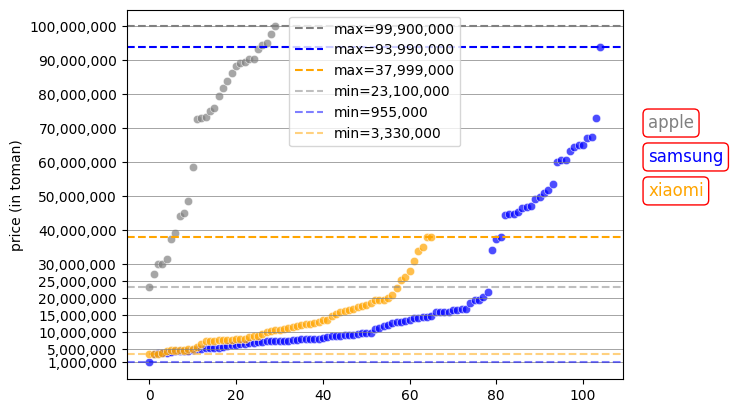

In [9]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 25_000_000,30_000_000,40_000_000,50_000_000,60_000_000,70_000_000,80_000_000,90_000_000,100_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')

plt.text(115, 70_000_000, "apple",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(115, 60_000_000, "samsung",
         fontsize=12,  # Font size of the note
         color='blue',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(115, 50_000_000, "xiaomi",
         fontsize=12,  # Font size of the note
         color='orange',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# maximum prices
apple_max_price = dg_kala_apple_df[dg_kala_apple_df["price"] == dg_kala_apple_df["price"].max()]["price"].values[0]
samsung_max_price = dg_kala_samsung_df[dg_kala_samsung_df["price"] == dg_kala_samsung_df["price"].max()]["price"].values[0]
xiaomi_max_price = dg_kala_xiaomi_df[dg_kala_xiaomi_df["price"] == dg_kala_xiaomi_df["price"].max()]["price"].values[0]

# drawing a line through maximum prices
plt.axhline(y=apple_max_price, color='gray', linestyle='--', label=f'max={format_func(apple_max_price, 0)}')
plt.axhline(y=samsung_max_price, color='blue', linestyle='--', label=f'max={format_func(samsung_max_price,0)}')
plt.axhline(y=xiaomi_max_price, color='orange', linestyle='--', label=f'max={format_func(xiaomi_max_price,0)}')

# minimum prices
apple_min_price = dg_kala_apple_df[dg_kala_apple_df["price"] == dg_kala_apple_df["price"].min()]["price"].values[0]
samsung_min_price = dg_kala_samsung_df[dg_kala_samsung_df["price"] == dg_kala_samsung_df["price"].min()]["price"].values[0]
xiaomi_min_price = dg_kala_xiaomi_df[dg_kala_xiaomi_df["price"] == dg_kala_xiaomi_df["price"].min()]["price"].values[0]

# drawing a line through minimum prices
plt.axhline(y=apple_min_price, color='gray', linestyle='--', label=f'min={format_func(apple_min_price, 0)}', alpha=0.5)
plt.axhline(y=samsung_min_price, color='blue', linestyle='--', label=f'min={format_func(samsung_min_price, 0)}', alpha=0.5)
plt.axhline(y=xiaomi_min_price, color='orange', linestyle='--', label=f'min={format_func(xiaomi_min_price, 0)}', alpha=0.5)

# ploting all datas
sns.scatterplot(x=sorted_dg_kala_apple_df.index,y='price',data=sorted_dg_kala_apple_df, color="gray", alpha=0.7)
sns.scatterplot(x=sorted_dg_kala_samsung_df.index,y='price',data=sorted_dg_kala_samsung_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_dg_kala_xiaomi_df.index,y='price',data=sorted_dg_kala_xiaomi_df, color="orange", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

## Gooshi.onlie Prices

sort df in ascending format

In [10]:
sorted_gooshi_online_apple_df = gooshi_online_apple_df.sort_values(by='price', ascending=True).reset_index(drop=True)
sorted_gooshi_online_samsung_df = gooshi_online_samsung_df.sort_values(by='price', ascending=True).reset_index(drop=True)
sorted_gooshi_online_xiaomi_df = gooshi_online_xiaomi_df.sort_values(by='price', ascending=True).reset_index(drop=True)

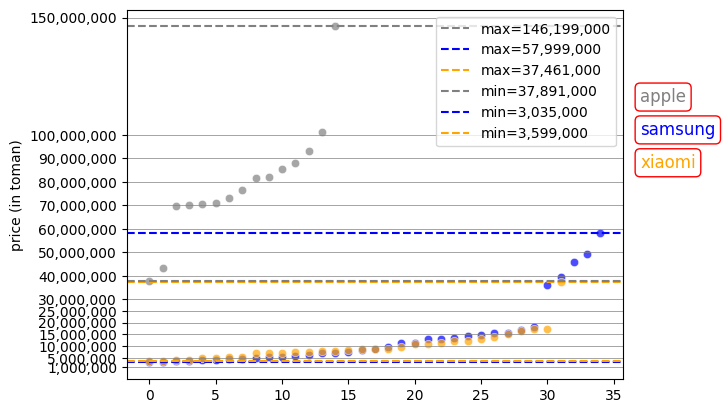

In [11]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 
                  25_000_000, 30_000_000, 40_000_000, 50_000_000, 60_000_000,
                  70_000_000, 80_000_000, 90_000_000, 100_000_000, 150_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')

plt.text(37, 114_000_000, "apple",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(37, 100_000_000, "samsung",
         fontsize=12,  # Font size of the note
         color='blue',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(37, 86_000_000, "xiaomi",
         fontsize=12,  # Font size of the note
         color='orange',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# maximum prices
apple_max_price = gooshi_online_apple_df[gooshi_online_apple_df["price"] == gooshi_online_apple_df["price"].max()]["price"].values[0]
samsung_max_price = gooshi_online_samsung_df[gooshi_online_samsung_df["price"] == gooshi_online_samsung_df["price"].max()]["price"].values[0]
xiaomi_max_price = gooshi_online_xiaomi_df[gooshi_online_xiaomi_df["price"] == gooshi_online_xiaomi_df["price"].max()]["price"].values[0]

# drawing a line through maximum prices
plt.axhline(y=apple_max_price, color='gray', linestyle='--', label=f'max={format_func(apple_max_price, 0)}')
plt.axhline(y=samsung_max_price, color='blue', linestyle='--', label=f'max={format_func(samsung_max_price,0)}')
plt.axhline(y=xiaomi_max_price, color='orange', linestyle='--', label=f'max={format_func(xiaomi_max_price,0)}')

# minimum prices
apple_min_price = gooshi_online_apple_df[gooshi_online_apple_df["price"] == gooshi_online_apple_df["price"].min()]["price"].values[0]
samsung_min_price = gooshi_online_samsung_df[gooshi_online_samsung_df["price"] == gooshi_online_samsung_df["price"].min()]["price"].values[0]
xiaomi_min_price = gooshi_online_xiaomi_df[gooshi_online_xiaomi_df["price"] == gooshi_online_xiaomi_df["price"].min()]["price"].values[0]

# drawing a line through minimum prices
plt.axhline(y=apple_min_price, color='gray', linestyle='--', label=f'min={format_func(apple_min_price, 0)}')
plt.axhline(y=samsung_min_price, color='blue', linestyle='--', label=f'min={format_func(samsung_min_price, 0)}')
plt.axhline(y=xiaomi_min_price, color='orange', linestyle='--', label=f'min={format_func(xiaomi_min_price, 0)}')


# ploting all datas
sns.scatterplot(x=sorted_gooshi_online_apple_df.index,y='price',data=sorted_gooshi_online_apple_df, color="gray", alpha=0.7)
sns.scatterplot(x=sorted_gooshi_online_samsung_df.index,y='price',data=sorted_gooshi_online_samsung_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_gooshi_online_xiaomi_df.index,y='price',data=sorted_gooshi_online_xiaomi_df, color="orange", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

## Meghdad IT

sort df in ascending format

In [17]:
sorted_meghdadit_apple_df = meghdadit_apple_df.sort_values(by='Price', ascending=True).reset_index(drop=True)
sorted_meghdadit_samsung_df = meghdadit_samsung_df.sort_values(by='Price', ascending=True).reset_index(drop=True)
sorted_meghdadit_xiaomi_df = meghdadit_xiaomi_df.sort_values(by='Price', ascending=True).reset_index(drop=True)

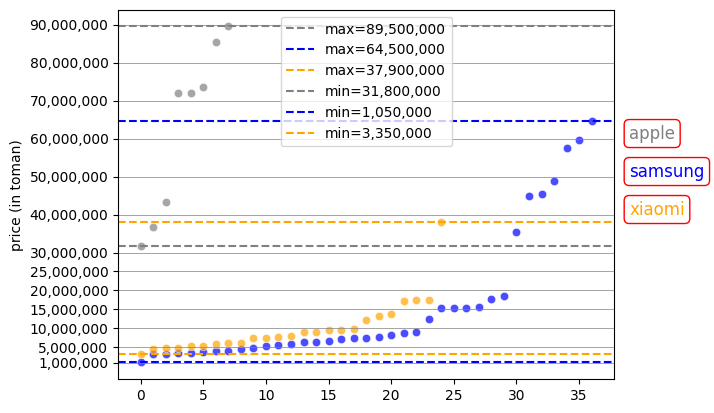

In [27]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 
                  25_000_000, 30_000_000, 40_000_000, 50_000_000, 60_000_000,
                  70_000_000, 80_000_000, 90_000_000, 100_000_000, 150_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')

plt.text(39, 60_000_000, "apple",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(39, 50_000_000, "samsung",
         fontsize=12,  # Font size of the note
         color='blue',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(39, 40_000_000, "xiaomi",
         fontsize=12,  # Font size of the note
         color='orange',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# maximum prices
apple_max_price = meghdadit_apple_df[meghdadit_apple_df["Price"] == meghdadit_apple_df["Price"].max()]["Price"].values[0]
samsung_max_price = meghdadit_samsung_df[meghdadit_samsung_df["Price"] == meghdadit_samsung_df["Price"].max()]["Price"].values[0]
xiaomi_max_price = meghdadit_xiaomi_df[meghdadit_xiaomi_df["Price"] == meghdadit_xiaomi_df["Price"].max()]["Price"].values[0]

# drawing a line through maximum prices
plt.axhline(y=apple_max_price, color='gray', linestyle='--', label=f'max={format_func(apple_max_price, 0)}')
plt.axhline(y=samsung_max_price, color='blue', linestyle='--', label=f'max={format_func(samsung_max_price,0)}')
plt.axhline(y=xiaomi_max_price, color='orange', linestyle='--', label=f'max={format_func(xiaomi_max_price,0)}')

# minimum prices
apple_min_price = meghdadit_apple_df[meghdadit_apple_df["Price"] == meghdadit_apple_df["Price"].min()]["Price"].values[0]
samsung_min_price = meghdadit_samsung_df[meghdadit_samsung_df["Price"] == meghdadit_samsung_df["Price"].min()]["Price"].values[0]
xiaomi_min_price = meghdadit_xiaomi_df[meghdadit_xiaomi_df["Price"] == meghdadit_xiaomi_df["Price"].min()]["Price"].values[0]

# drawing a line through minimum prices
plt.axhline(y=apple_min_price, color='gray', linestyle='--', label=f'min={format_func(apple_min_price, 0)}')
plt.axhline(y=samsung_min_price, color='blue', linestyle='--', label=f'min={format_func(samsung_min_price, 0)}')
plt.axhline(y=xiaomi_min_price, color='orange', linestyle='--', label=f'min={format_func(xiaomi_min_price, 0)}')


# ploting all datas
sns.scatterplot(x=sorted_meghdadit_apple_df.index,y='Price',data=sorted_meghdadit_apple_df, color="gray", alpha=0.7)
sns.scatterplot(x=sorted_meghdadit_samsung_df.index,y='Price',data=sorted_meghdadit_samsung_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_meghdadit_xiaomi_df.index,y='Price',data=sorted_meghdadit_xiaomi_df, color="orange", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

## Technolife

sort df in ascending format

In [28]:
sorted_technolife_apple_df = technolife_apple_df.sort_values(by='Price', ascending=True).reset_index(drop=True)
sorted_technolife_samsung_df = technolife_samsung_df.sort_values(by='Price', ascending=True).reset_index(drop=True)
sorted_technolife_xiaomi_df = technolife_xiaomi_df.sort_values(by='Price', ascending=True).reset_index(drop=True)

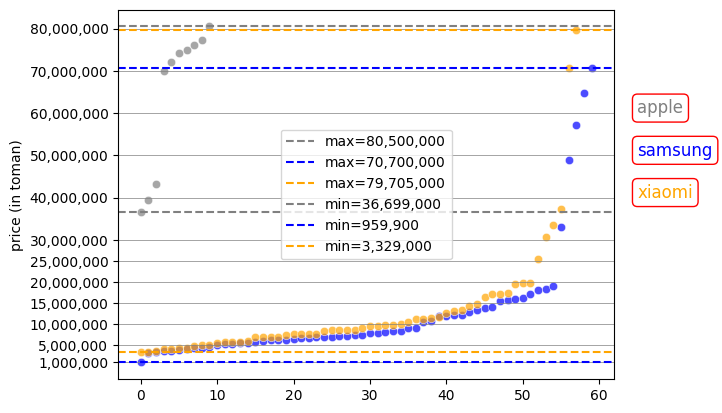

In [31]:
# modifying plt
plt.ticklabel_format(style='plain', useOffset=False)

plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
# Set custom y-axis tick values
custom_y_ticks = [1_000_000, 5_000_000, 10_000_000, 15_000_000, 20_000_000, 
                  25_000_000, 30_000_000, 40_000_000, 50_000_000, 60_000_000,
                  70_000_000, 80_000_000, 90_000_000, 100_000_000, 150_000_000]  # Replace with your desired tick values
plt.yticks(custom_y_ticks)

plt.ylabel('price (in toman)')

plt.text(65, 60_000_000, "apple",
         fontsize=12,  # Font size of the note
         color='gray',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(65, 50_000_000, "samsung",
         fontsize=12,  # Font size of the note
         color='blue',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note
plt.text(65, 40_000_000, "xiaomi",
         fontsize=12,  # Font size of the note
         color='orange',  # Color of the note
         bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))  # Add a colored box around the note

# maximum prices
apple_max_price = technolife_apple_df[technolife_apple_df["Price"] == technolife_apple_df["Price"].max()]["Price"].values[0]
samsung_max_price = technolife_samsung_df[technolife_samsung_df["Price"] == technolife_samsung_df["Price"].max()]["Price"].values[0]
xiaomi_max_price = technolife_xiaomi_df[technolife_xiaomi_df["Price"] == technolife_xiaomi_df["Price"].max()]["Price"].values[0]

# drawing a line through maximum prices
plt.axhline(y=apple_max_price, color='gray', linestyle='--', label=f'max={format_func(apple_max_price, 0)}')
plt.axhline(y=samsung_max_price, color='blue', linestyle='--', label=f'max={format_func(samsung_max_price,0)}')
plt.axhline(y=xiaomi_max_price, color='orange', linestyle='--', label=f'max={format_func(xiaomi_max_price,0)}')

# minimum prices
apple_min_price = technolife_apple_df[technolife_apple_df["Price"] == technolife_apple_df["Price"].min()]["Price"].values[0]
samsung_min_price = technolife_samsung_df[technolife_samsung_df["Price"] == technolife_samsung_df["Price"].min()]["Price"].values[0]
xiaomi_min_price = technolife_xiaomi_df[technolife_xiaomi_df["Price"] == technolife_xiaomi_df["Price"].min()]["Price"].values[0]

# drawing a line through minimum prices
plt.axhline(y=apple_min_price, color='gray', linestyle='--', label=f'min={format_func(apple_min_price, 0)}')
plt.axhline(y=samsung_min_price, color='blue', linestyle='--', label=f'min={format_func(samsung_min_price, 0)}')
plt.axhline(y=xiaomi_min_price, color='orange', linestyle='--', label=f'min={format_func(xiaomi_min_price, 0)}')


# ploting all datas
sns.scatterplot(x=sorted_technolife_apple_df.index,y='Price',data=sorted_technolife_apple_df, color="gray", alpha=0.7)
sns.scatterplot(x=sorted_technolife_samsung_df.index,y='Price',data=sorted_technolife_samsung_df, color="blue", alpha=0.7)
sns.scatterplot(x=sorted_technolife_xiaomi_df.index,y='Price',data=sorted_technolife_xiaomi_df, color="orange", alpha=0.7)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))